In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
import random

In [62]:
FILE_PATH = 'Dataset/Stroke.csv'

In [63]:
df=pd.read_csv(FILE_PATH)

# Exploratory Data Analysis

In [64]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [65]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [66]:
df = df.dropna()

In [67]:
df.nunique(axis=0)

id                   4909
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3852
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [68]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

<Axes: >

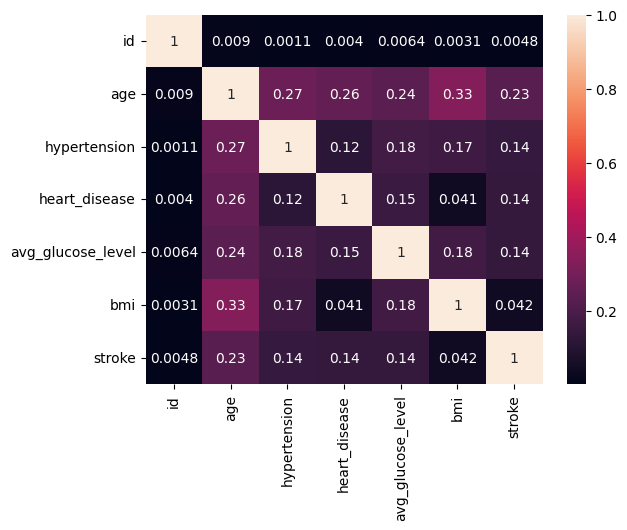

In [69]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

# KNN with different K

In [70]:
x = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [71]:
ct = ColumnTransformer([('encoder', OneHotEncoder(), [0, 4, 5, 6, 9])], remainder='passthrough')
x = ct.fit_transform(x)

In [72]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [73]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Accuracy: 0.9256619144602851 where neighbours = 1
AUC: 0.517311835946207 where neighbours = 1

Accuracy: 0.9521384928716904 where neighbours = 2
AUC: 0.5343264729920499 where neighbours = 2

Accuracy: 0.9490835030549898 where neighbours = 3
AUC: 0.595388463729351 where neighbours = 3

Accuracy: 0.955193482688391 where neighbours = 4
AUC: 0.6265571984050325 where neighbours = 4

Accuracy: 0.9511201629327902 where neighbours = 5
AUC: 0.6260990167669713 where neighbours = 5



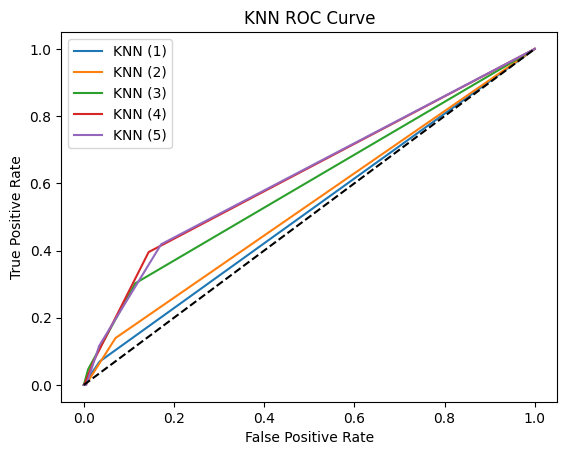

In [91]:
fpr_list = []
tpr_list = []

for neighbours in range(1, 6):
    knn = KNeighborsClassifier(n_neighbors=neighbours)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracy = knn.score(x_test, y_test)
    print(f"Accuracy: {accuracy} where neighbours = {neighbours}")

    y_pred_proba = knn.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    auc = roc_auc_score(y_test, y_pred_proba)
    print(f"AUC: {auc} where neighbours = {neighbours}")
    print()

for i in range(5):
    plt.plot(fpr_list[i], tpr_list[i], label=f'KNN ({i+1})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.legend()
plt.show()